In [14]:
# for array computations and loading data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
# for building and training neural networks
import tensorflow as tf

# custom functions
import utils

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

### Load and vizualize the data

In [7]:
data = np.array([[1651.,    432.65],
 [1691.82,  454.94],
 [1732.63,  471.53],
 [1773.45,  482.51],
 [1814.27,  468.36],
 [1855.08,  482.15],
 [1895.9,   540.02],
 [1936.71,  534.58],
 [1977.53,  558.35],
 [2018.35,  566.42],
 [2059.16,  581.4 ],
 [2099.98,  596.46],
 [2140.8 ,  596.71],
 [2181.61,  619.45],
 [2222.43,  616.58],
 [2263.24,  653.16],
 [2304.06,  666.52],
 [2344.88,  670.59],
 [2385.69,  669.02],
 [2426.51,  678.91],
 [2467.33,  707.44],
 [2508.14,  710.76],
 [2548.96,  745.19],
 [2589.78,  729.85],
 [2630.59,  743.8 ],
 [2671.41,  738.2 ],
 [2712.22,  772.95],
 [2753.04,  772.22],
 [2793.86,  784.21],
 [2834.67,  776.43],
 [2875.49,  804.78],
 [2916.31,  833.27],
 [2957.12,  825.69],
 [2997.94,  821.05],
 [3038.76,  833.82],
 [3079.57,  833.06],
 [3120.39,  825.7 ],
 [3161.2,   843.58],
 [3202.02,  869.4 ],
 [3242.84,  851.5 ],
 [3283.65,  863.18],
 [3324.47,  853.01],
 [3365.29,  877.16],
 [3406.1,   863.74],
 [3446.92,  874.67],
 [3487.73,  877.74],
 [3528.55,  874.11],
 [3569.37,  882.8 ],
 [3610.18,  910.83],
 [3651.,    897.42]]
)

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


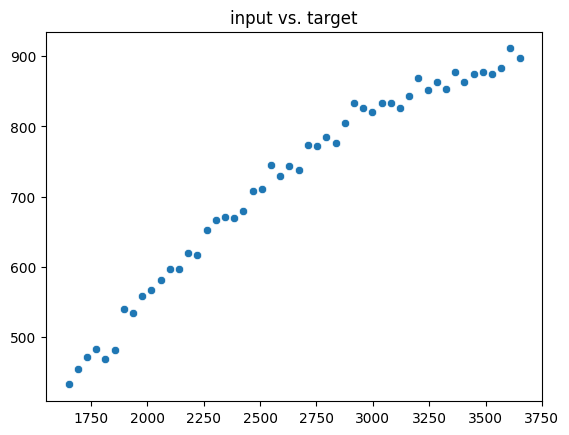

In [19]:
ax = sns.scatterplot(x=x[:, 0], y=y[:, 0])
ax.set_title("input vs. target")
plt.show()

### Split the dataset into training, cross validation, and test sets

In [20]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


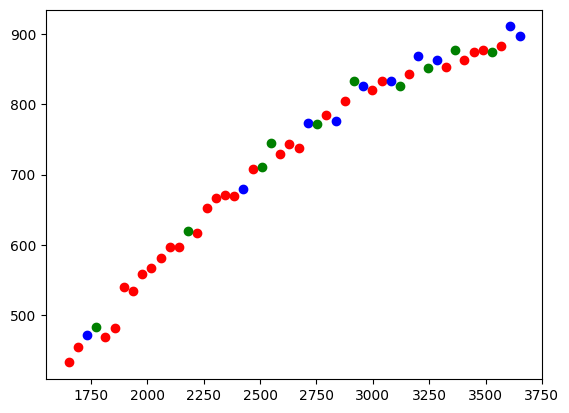

In [45]:
plt.scatter(x=x_train[:, 0], y=y_train[:, 0], c='red')
plt.scatter(x=x_test[:, 0], y=y_test[:, 0], c='blue')
plt.scatter(x=x_cv[:, 0], y=y_cv[:, 0], c='green')
plt.show()

## Linear regression

### Fit a linear model
**Feature scaling**

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


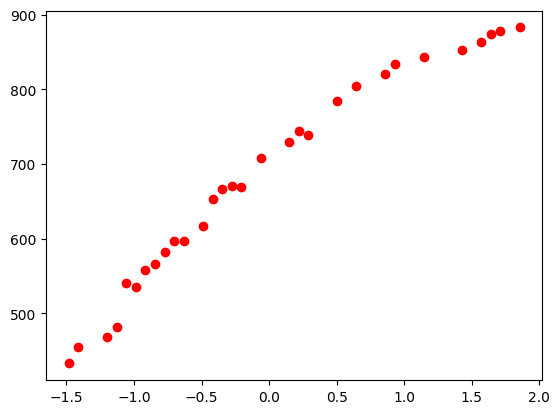

In [49]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plt.scatter(x=X_train_scaled[:, 0], y=y_train[:, 0], c='red')

plt.show()

**Train the model**

In [51]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

**Evaluate the Model**

In [52]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.18142643101237
training MSE (for-loop implementation): 406.1814264310124


In [54]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE(meen squared error): {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE(meen squared error): 551.7633686764407


### Adding Polynomial Features
**Adding Polynomial Features**


In [55]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


In [56]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [57]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.115763074720604
Cross validation MSE: 87.69466438435839


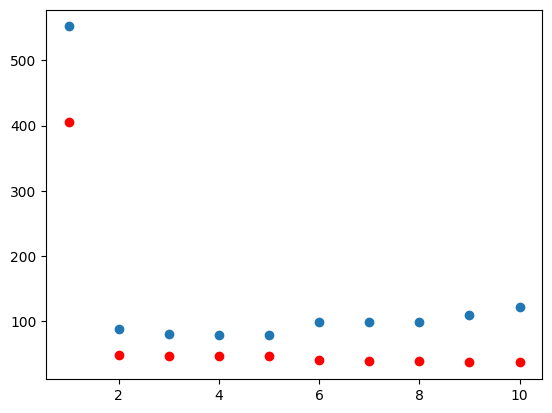

In [65]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
# Plot the results
plt.scatter(x=degrees, y=train_mses, color='red')
plt.scatter(x=degrees, y=cv_mses)
plt.show()

**Choosing the best model**

In [67]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [68]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.42
Test MSE: 104.64


## Neural Networks
### Prepare the Data

In [73]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [74]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and train the models

In [100]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = [
    Sequential(
    [               
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=1, activation='relu', name='L3')
    ], name = "model_arch_1" 
),
    Sequential(
    [               
        Dense(units=20, activation='relu', name='L1'),
        Dense(units=12, activation='relu', name='L2'),
        Dense(units=12, activation='relu', name='L3'),
        Dense(units=20, activation='relu', name='L4'),
        Dense(units=1, activation='relu', name='L5')
    ], name = "model_arch_2" 
), 
        Sequential(
    [               
        Dense(units=32, activation='relu', name='L1'),
        Dense(units=16, activation='relu', name='L2'),
        Dense(units=8, activation='relu', name='L3'),
        Dense(units=4, activation='relu', name='L4'),
        Dense(units=12, activation='relu', name='L5'),
        Dense(units=1, activation='relu', name='L6')
    ], name = "model_arch_3" 
)
]

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_arch_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training model_arch_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Training model_arch_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
RESULTS:
Model 1: Training MSE: 406.18, CV MSE: 571.75
Model 2: Training MSE: 406.18, CV MSE: 551.89
Model 3: Training MSE: 406.18, CV MSE: 295399.77


In [101]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Selected Model: 2
Training MSE: 406.18
Cross Validation MSE: 551.89
Test MSE: 511.44


### Classification

In [87]:
data = np.array([[1.00e+03, 1.46e+03, 0.00e+00],
       [1.05e+03, 1.01e+03, 0.00e+00],
       [1.09e+03, 8.54e+02, 0.00e+00],
       [1.14e+03, 2.56e+03, 0.00e+00],
       [1.18e+03, 4.62e+03, 0.00e+00],
       [1.23e+03, 4.97e+03, 0.00e+00],
       [1.27e+03, 2.39e+03, 0.00e+00],
       [1.32e+03, 1.01e+02, 0.00e+00],
       [1.36e+03, 7.29e+02, 0.00e+00],
       [1.41e+03, 4.22e+03, 0.00e+00],
       [1.45e+03, 4.30e+03, 0.00e+00],
       [1.50e+03, 4.52e+02, 0.00e+00],
       [1.54e+03, 2.76e+02, 0.00e+00],
       [1.59e+03, 2.24e+03, 0.00e+00],
       [1.63e+03, 2.76e+03, 0.00e+00],
       [1.68e+03, 2.96e+03, 0.00e+00],
       [1.72e+03, 3.99e+03, 0.00e+00],
       [1.77e+03, 8.79e+02, 0.00e+00],
       [1.81e+03, 3.42e+03, 0.00e+00],
       [1.86e+03, 1.48e+03, 0.00e+00],
       [1.90e+03, 1.28e+03, 0.00e+00],
       [1.95e+03, 4.02e+02, 0.00e+00],
       [1.99e+03, 1.11e+03, 0.00e+00],
       [2.04e+03, 2.36e+03, 0.00e+00],
       [2.09e+03, 7.79e+02, 1.00e+00],
       [2.13e+03, 4.07e+03, 0.00e+00],
       [2.18e+03, 9.55e+02, 0.00e+00],
       [2.22e+03, 7.04e+02, 1.00e+00],
       [2.27e+03, 4.85e+03, 0.00e+00],
       [2.31e+03, 6.78e+02, 0.00e+00],
       [2.36e+03, 1.18e+03, 1.00e+00],
       [2.40e+03, 4.15e+03, 0.00e+00],
       [2.45e+03, 4.87e+03, 0.00e+00],
       [2.49e+03, 4.45e+03, 0.00e+00],
       [2.54e+03, 4.42e+03, 0.00e+00],
       [2.58e+03, 2.44e+03, 0.00e+00],
       [2.63e+03, 4.37e+03, 0.00e+00],
       [2.67e+03, 1.83e+03, 1.00e+00],
       [2.72e+03, 1.73e+03, 0.00e+00],
       [2.76e+03, 4.32e+03, 0.00e+00],
       [2.81e+03, 2.71e+03, 0.00e+00],
       [2.85e+03, 2.69e+03, 0.00e+00],
       [2.90e+03, 4.75e+03, 0.00e+00],
       [2.94e+03, 3.52e+02, 1.00e+00],
       [2.99e+03, 1.41e+03, 0.00e+00],
       [3.04e+03, 4.77e+02, 0.00e+00],
       [3.08e+03, 2.86e+03, 0.00e+00],
       [3.13e+03, 9.80e+02, 0.00e+00],
       [3.17e+03, 4.65e+03, 0.00e+00],
       [3.22e+03, 3.12e+03, 0.00e+00],
       [3.26e+03, 2.46e+03, 0.00e+00],
       [3.31e+03, 3.09e+03, 0.00e+00],
       [3.35e+03, 2.99e+03, 0.00e+00],
       [3.40e+03, 1.33e+03, 1.00e+00],
       [3.44e+03, 8.29e+02, 1.00e+00],
       [3.49e+03, 4.50e+03, 0.00e+00],
       [3.53e+03, 4.55e+03, 0.00e+00],
       [3.58e+03, 2.66e+03, 1.00e+00],
       [3.62e+03, 5.00e+03, 0.00e+00],
       [3.67e+03, 3.47e+03, 0.00e+00],
       [3.71e+03, 2.91e+03, 0.00e+00],
       [3.76e+03, 1.68e+03, 0.00e+00],
       [3.80e+03, 1.96e+03, 0.00e+00],
       [3.85e+03, 1.06e+03, 0.00e+00],
       [3.89e+03, 4.27e+02, 0.00e+00],
       [3.94e+03, 1.26e+02, 1.00e+00],
       [3.98e+03, 3.19e+03, 0.00e+00],
       [4.03e+03, 2.64e+03, 1.00e+00],
       [4.08e+03, 1.21e+03, 1.00e+00],
       [4.12e+03, 1.66e+03, 1.00e+00],
       [4.17e+03, 1.36e+03, 0.00e+00],
       [4.21e+03, 2.11e+03, 0.00e+00],
       [4.26e+03, 4.60e+03, 0.00e+00],
       [4.30e+03, 3.97e+03, 0.00e+00],
       [4.35e+03, 4.17e+03, 0.00e+00],
       [4.39e+03, 2.84e+03, 1.00e+00],
       [4.44e+03, 3.02e+02, 1.00e+00],
       [4.48e+03, 2.94e+03, 0.00e+00],
       [4.53e+03, 2.34e+03, 1.00e+00],
       [4.57e+03, 3.02e+03, 0.00e+00],
       [4.62e+03, 3.87e+03, 0.00e+00],
       [4.66e+03, 2.26e+03, 0.00e+00],
       [4.71e+03, 2.04e+03, 0.00e+00],
       [4.75e+03, 3.07e+03, 1.00e+00],
       [4.80e+03, 4.80e+03, 0.00e+00],
       [4.84e+03, 3.27e+02, 1.00e+00],
       [4.89e+03, 2.06e+03, 0.00e+00],
       [4.93e+03, 3.32e+03, 1.00e+00],
       [4.98e+03, 4.70e+03, 0.00e+00],
       [5.03e+03, 1.13e+03, 0.00e+00],
       [5.07e+03, 2.49e+03, 1.00e+00],
       [5.12e+03, 9.05e+02, 1.00e+00],
       [5.16e+03, 4.05e+03, 0.00e+00],
       [5.21e+03, 4.67e+03, 0.00e+00],
       [5.25e+03, 3.84e+03, 0.00e+00],
       [5.30e+03, 2.59e+03, 1.00e+00],
       [5.34e+03, 4.90e+03, 0.00e+00],
       [5.39e+03, 4.95e+03, 0.00e+00],
       [5.43e+03, 3.72e+03, 1.00e+00],
       [5.48e+03, 4.35e+03, 0.00e+00],
       [5.52e+03, 1.88e+03, 1.00e+00],
       [5.57e+03, 5.28e+02, 1.00e+00],
       [5.61e+03, 2.29e+03, 1.00e+00],
       [5.66e+03, 3.82e+03, 1.00e+00],
       [5.70e+03, 5.03e+01, 1.00e+00],
       [5.75e+03, 1.76e+03, 1.00e+00],
       [5.79e+03, 2.14e+03, 1.00e+00],
       [5.84e+03, 3.77e+03, 1.00e+00],
       [5.88e+03, 1.51e+02, 1.00e+00],
       [5.93e+03, 2.81e+03, 0.00e+00],
       [5.97e+03, 0.00e+00, 1.00e+00],
       [6.02e+03, 3.89e+03, 0.00e+00],
       [6.07e+03, 1.93e+03, 1.00e+00],
       [6.11e+03, 1.63e+03, 1.00e+00],
       [6.16e+03, 1.38e+03, 1.00e+00],
       [6.20e+03, 4.20e+03, 1.00e+00],
       [6.25e+03, 2.21e+03, 1.00e+00],
       [6.29e+03, 3.27e+03, 1.00e+00],
       [6.34e+03, 1.16e+03, 1.00e+00],
       [6.38e+03, 1.56e+03, 1.00e+00],
       [6.43e+03, 1.86e+03, 1.00e+00],
       [6.47e+03, 2.31e+03, 1.00e+00],
       [6.52e+03, 3.69e+03, 0.00e+00],
       [6.56e+03, 4.02e+03, 1.00e+00],
       [6.61e+03, 3.59e+03, 1.00e+00],
       [6.65e+03, 2.19e+03, 1.00e+00],
       [6.70e+03, 4.52e+03, 0.00e+00],
       [6.74e+03, 3.64e+03, 0.00e+00],
       [6.79e+03, 4.12e+03, 0.00e+00],
       [6.83e+03, 2.51e+02, 1.00e+00],
       [6.88e+03, 8.04e+02, 1.00e+00],
       [6.92e+03, 2.09e+03, 1.00e+00],
       [6.97e+03, 4.57e+03, 1.00e+00],
       [7.02e+03, 2.51e+03, 1.00e+00],
       [7.06e+03, 3.14e+03, 1.00e+00],
       [7.11e+03, 5.78e+02, 1.00e+00],
       [7.15e+03, 3.17e+03, 1.00e+00],
       [7.20e+03, 2.26e+02, 1.00e+00],
       [7.24e+03, 4.27e+03, 1.00e+00],
       [7.29e+03, 2.61e+03, 1.00e+00],
       [7.33e+03, 3.79e+03, 1.00e+00],
       [7.38e+03, 3.39e+03, 1.00e+00],
       [7.42e+03, 2.79e+03, 1.00e+00],
       [7.47e+03, 4.72e+03, 1.00e+00],
       [7.51e+03, 1.61e+03, 1.00e+00],
       [7.56e+03, 3.77e+02, 1.00e+00],
       [7.60e+03, 1.03e+03, 1.00e+00],
       [7.65e+03, 4.10e+03, 1.00e+00],
       [7.69e+03, 2.74e+03, 1.00e+00],
       [7.74e+03, 2.01e+03, 1.00e+00],
       [7.78e+03, 1.31e+03, 1.00e+00],
       [7.83e+03, 6.53e+02, 1.00e+00],
       [7.87e+03, 1.91e+03, 1.00e+00],
       [7.92e+03, 1.08e+03, 1.00e+00],
       [7.96e+03, 6.03e+02, 1.00e+00],
       [8.01e+03, 7.54e+01, 1.00e+00],
       [8.06e+03, 4.25e+03, 1.00e+00],
       [8.10e+03, 1.23e+03, 1.00e+00],
       [8.15e+03, 3.74e+03, 1.00e+00],
       [8.19e+03, 3.29e+03, 1.00e+00],
       [8.24e+03, 4.77e+03, 1.00e+00],
       [8.28e+03, 7.54e+02, 1.00e+00],
       [8.33e+03, 3.04e+03, 1.00e+00],
       [8.37e+03, 2.89e+03, 1.00e+00],
       [8.42e+03, 4.40e+03, 1.00e+00],
       [8.46e+03, 2.01e+02, 1.00e+00],
       [8.51e+03, 1.51e+03, 1.00e+00],
       [8.55e+03, 3.22e+03, 1.00e+00],
       [8.60e+03, 2.51e+01, 1.00e+00],
       [8.64e+03, 1.43e+03, 1.00e+00],
       [8.69e+03, 5.53e+02, 1.00e+00],
       [8.73e+03, 1.53e+03, 1.00e+00],
       [8.78e+03, 1.58e+03, 1.00e+00],
       [8.82e+03, 1.76e+02, 1.00e+00],
       [8.87e+03, 4.92e+03, 1.00e+00],
       [8.91e+03, 3.54e+03, 1.00e+00],
       [8.96e+03, 2.16e+03, 1.00e+00],
       [9.01e+03, 2.41e+03, 1.00e+00],
       [9.05e+03, 1.71e+03, 1.00e+00],
       [9.10e+03, 1.26e+03, 1.00e+00],
       [9.14e+03, 3.57e+03, 1.00e+00],
       [9.19e+03, 3.94e+03, 1.00e+00],
       [9.23e+03, 3.92e+03, 1.00e+00],
       [9.28e+03, 3.49e+03, 1.00e+00],
       [9.32e+03, 3.67e+03, 1.00e+00],
       [9.37e+03, 2.54e+03, 1.00e+00],
       [9.41e+03, 5.03e+02, 1.00e+00],
       [9.46e+03, 4.47e+03, 1.00e+00],
       [9.50e+03, 6.28e+02, 1.00e+00],
       [9.55e+03, 3.37e+03, 1.00e+00],
       [9.59e+03, 1.78e+03, 1.00e+00],
       [9.64e+03, 3.24e+03, 1.00e+00],
       [9.68e+03, 3.62e+03, 1.00e+00],
       [9.73e+03, 4.82e+03, 1.00e+00],
       [9.77e+03, 1.98e+03, 1.00e+00],
       [9.82e+03, 3.34e+03, 1.00e+00],
       [9.86e+03, 3.44e+03, 1.00e+00],
       [9.91e+03, 1.81e+03, 1.00e+00],
       [9.95e+03, 3.52e+03, 1.00e+00],
       [1.00e+04, 9.30e+02, 1.00e+00]])

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


### Split and prepare the dataset

In [88]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [89]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

### Evaluating the error for classification models


In [90]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [97]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = nn_models = [
    Sequential(
    [               
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=1, activation='linear', name='L3')
    ], name = "model_arch_1" 
),
    Sequential(
    [               
        Dense(units=20, activation='relu', name='L1'),
        Dense(units=12, activation='relu', name='L2'),
        Dense(units=12, activation='relu', name='L3'),
        Dense(units=20, activation='relu', name='L4'),
        Dense(units=1, activation='linear', name='L5')
    ], name = "model_arch_2" 
), 
        Sequential(
    [               
        Dense(units=32, activation='relu', name='L1'),
        Dense(units=16, activation='relu', name='L2'),
        Dense(units=8, activation='relu', name='L3'),
        Dense(units=4, activation='relu', name='L4'),
        Dense(units=12, activation='relu', name='L5'),
        Dense(units=1, activation='linear', name='L6')
    ], name = "model_arch_3" 
)
]


# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_arch_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_arch_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_arch_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model 1: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.15000
Model 2: Training Set Classification Error: 0.10833, CV Set Classification Error: 0.17500
Model 3: Training Set Classification Error: 0.07500, CV Set Classification Error: 0.10000


In [98]:
# Select the model with the lowest error
model_num = 2

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Selected Model: 2
Training Set Classification Error: 0.1083
CV Set Classification Error: 0.1750
Test Set Classification Error: 0.2000
